# Setup

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [61]:
def reshape(x, n):
    x = x.reshape((n, 28 * 28))
    return x.astype('float32') / 255

def get_train_data(data_path=None):
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.utils import to_categorical
    if data_path:
        raise NotImplementedError(f"Custom data file yet supported: {data_path}")
    else:
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
    print("Data:")
    print("  x_train.shape:", x_train.shape)
    print("  y_train.shape:", y_train.shape)
    print("  x_test.shape:", x_test.shape)
    print("  y_test.shape:", y_test.shape)
    
    x_train = reshape(x_train, x_train.shape[0])
    x_test = reshape(x_test, x_test.shape[0])
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    print("Data after reshape:")
    print("  x_train.shape:", x_train.shape)
    print("  y_train.shape:", y_train.shape)
    print("  x_test.shape:", x_test.shape)
    print("  y_test.shape:", y_test.shape)

    plt.imshow(x_train[0].reshape(28, -1))
    plt.show()
    return x_train, y_train, x_test, y_test

def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
    model.add(keras.layers.Dense(10, activation="softmax"))
    return model

def train_model(x_train, y_train):
    import tensorflow.keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    
    model = build_model()
    model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
    #model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.summary()

    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=.2)
    print("model.type:",type(model))
    
    return model, history

def evaluate_model(model, x_test, y_test):
    score = model.evaluate(x_test, y_test, verbose=1)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    
def show_history(history): 
    plt.figure(figsize=(18, 6))

    # 에포크별 정확도
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.title("accuracy")
    plt.legend()

    # 에포크별 손실률
    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.title("loss")
    plt.legend()

    plt.show()    

In [ ]:
def main(): 
    # Automatically capture the model's parameters, metrics, artifacts,
    # and source code with the `autolog()` function
    mlflow.tensorflow.autolog()

    with mlflow.start_run() as run:
        print("MLflow:")
        print("  run_id:",run.info.run_id)
        print("  experiment_id:",run.info.experiment_id)
        mlflow.set_tag("version.mlflow", mlflow.__version__)
        mlflow.set_tag("version.keras", keras.__version__)
        
        x_train, y_train, x_test, y_test = get_train_data()
        
        model, history = train_model(x_train, y_train)
        
        evaluate_model(model,x_test, y_test) 
        
        show_history(history)
        
        model.save("./mnist.h5")
        
        model2 = keras.models.load_model("./mnist.h5")
        
main()

Data:
  x_train.shape: (60000, 28, 28)
  y_train.shape: (60000,)
  x_test.shape: (10000, 28, 28)
  y_test.shape: (10000,)
Data after reshape:
  x_train.shape: (60000, 784)
  y_train.shape: (60000, 10)
  x_test.shape: (10000, 784)
  y_test.shape: (10000, 10)


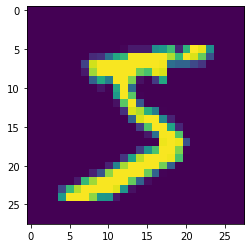

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4016 - accuracy: 0.8800 - val_loss: 0.1290 - val_accuracy: 0.9610
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1127 - accuracy: 0.9669 - val_loss: 0.0974 - val_accuracy: 0.9722
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0671 - accuracy: 0.9792 - val_loss: 0.1090 - val_accuracy: 0.9704
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0492 - 

2022/03/02 16:58:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: '/tf/k8s-ai/src/mlflow/mlruns' does not exist.


model.type: <class 'tensorflow.python.keras.engine.sequential.Sequential'>
313/313 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9804
Test loss: 0.08399876952171326
Test accuracy: 0.980400025844574


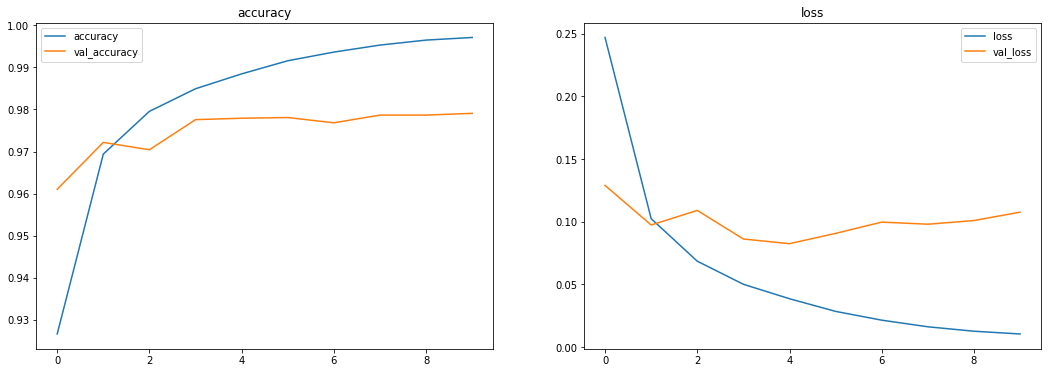

In [63]:
def main(): 
    x_train, y_train, x_test, y_test = get_train_data()

    model, history = train_model(x_train, y_train)

    evaluate_model(model,x_test, y_test) 

    show_history(history)

    model.save("./mnist.h5")

    model2 = keras.models.load_model("./mnist.h5")
        
main()

# Reference
- https://keras.io/examples/vision/mnist_convnet/